<a href="https://colab.research.google.com/github/Amitabh-Phule/Machine-Learning/blob/main/Exp4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**1. Load Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


**2. Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify columns to drop including those that became bound methods from incorrect fillna
columns_to_drop = ['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', 'Postal Code', 'Legislative District', '2020 Census Tract', 'Base MSRP', 'Electric Range']

# Drop columns from the original DataFrame
df = df.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values in remaining columns
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

target_col = 'Electric Vehicle Type'  # Corrected target column

# Encode target if categorical
if df[target_col].dtype == object:
    le = LabelEncoder()
    df[target_col] = le.fit_transform(df[target_col])

# Handle categorical features with one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns.drop(target_col, errors='ignore')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the processed DataFrame and check for missing values
display(df.head())
print("\nMissing values after preprocessing:")
print(df.isnull().sum())

,Model Year,Electric Vehicle Type,County_Adams,County_Alameda,County_Albemarle,County_Alexandria,County_Allegheny,County_Allen,County_Anchorage,County_Anne Arundel,...,Electric Utility_PORTLAND GENERAL ELECTRIC CO,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY
0,2022,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2022,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2016,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2019,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False



Missing values after preprocessing:
Model Year                                                             0
Electric Vehicle Type                                                  0
County_Adams                                                           0
County_Alameda                                                         0
County_Albemarle                                                       0
                                                                      ..
Electric Utility_PUD NO 1 OF WHATCOM COUNTY                            0
Electric Utility_PUD NO 2 OF GRANT COUNTY                              0
Electric Utility_PUGET SOUND ENERGY INC                                0
Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)         0
Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY    0
Length: 1392, dtype: int64


**3. Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
target_col = 'Electric Vehicle Type'
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set samples: {X_train.shape[0]}")
print(f"Test set samples: {X_test.shape[0]}")

Train set samples: 200527
Test set samples: 50132


**4. Train Decision Tree (without Pruning)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_no_pruning = DecisionTreeClassifier(random_state=42)
dt_no_pruning.fit(X_train, y_train)
print("Decision Tree trained without pruning.")

Decision Tree trained without pruning.


**5. Visualize the Tree Structure (no pruning)**

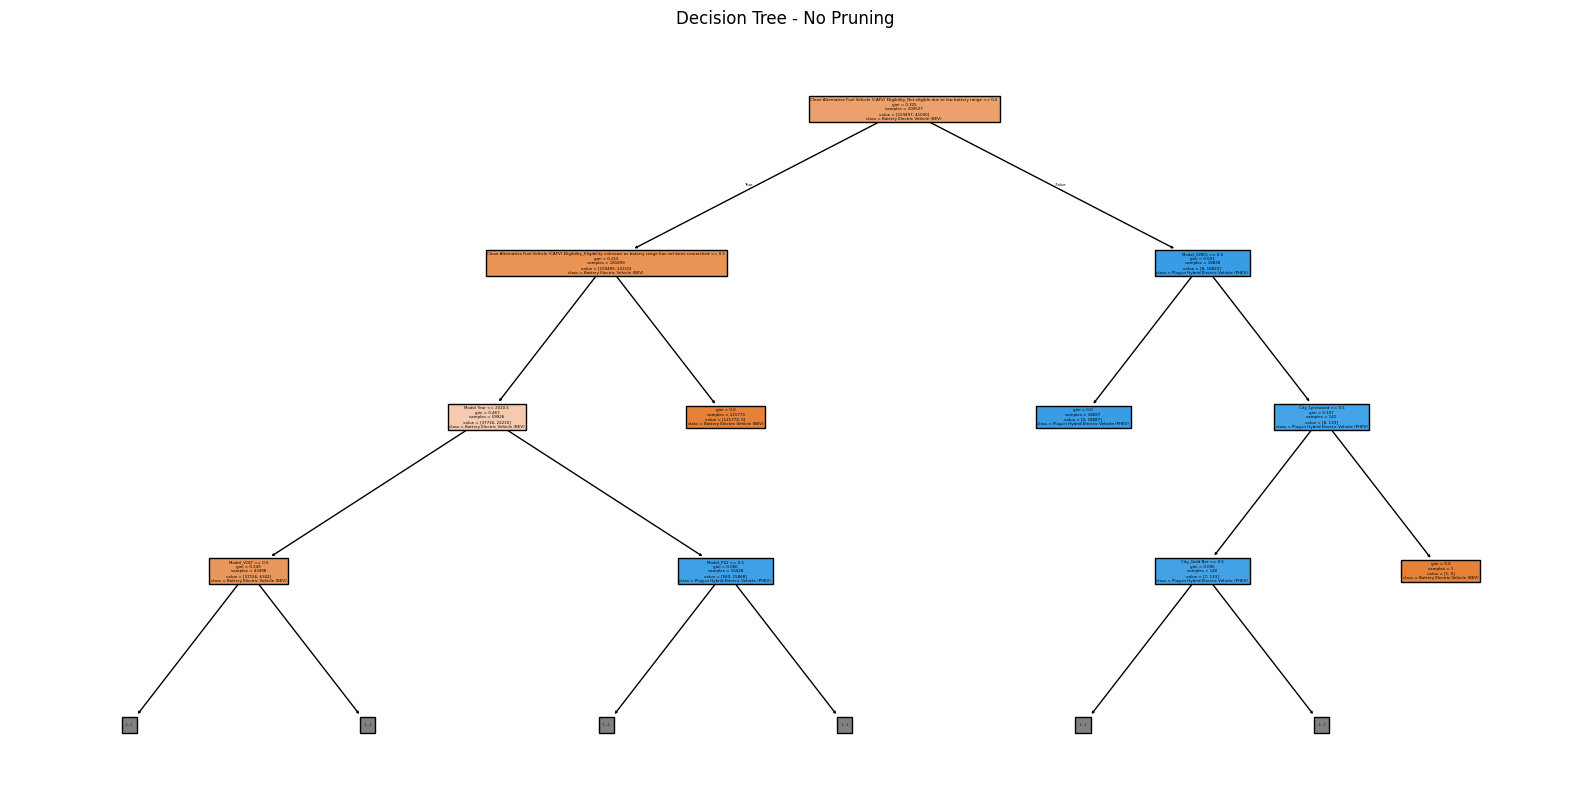

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd

columns_to_drop = ['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', 'Postal Code', 'Legislative District', '2020 Census Tract', 'Base MSRP', 'Electric Range']

X_processed_for_plotting = X.drop(columns=columns_to_drop, errors='ignore')

categorical_cols_for_plotting = X_processed_for_plotting.select_dtypes(include='object').columns

X_processed_for_plotting = pd.get_dummies(X_processed_for_plotting, columns=categorical_cols_for_plotting, drop_first=True)


plt.figure(figsize=(20,10))
plot_tree(dt_no_pruning, feature_names=X_processed_for_plotting.columns, class_names=[str(c) for c in np.unique(y)], filled=True, max_depth=3) # Use feature names from processed X
plt.title("Decision Tree - No Pruning")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_pruned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
dt_pruned.fit(X_train, y_train)
print("Decision Tree trained with pruning.")

Decision Tree trained with pruning.


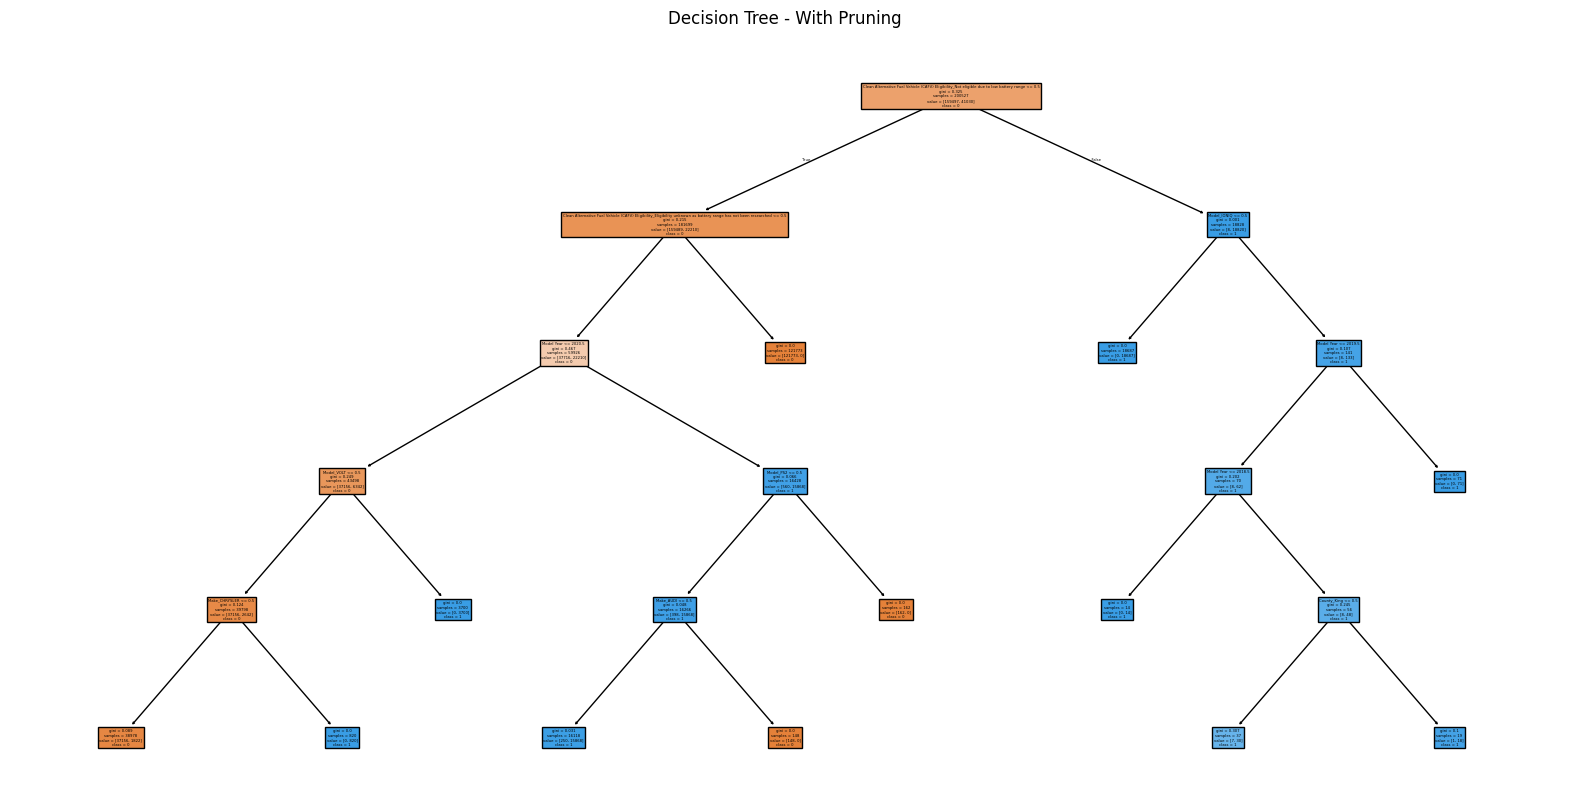

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
plt.figure(figsize=(20,10))
plot_tree(dt_pruned, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True)
plt.title("Decision Tree - With Pruning")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred_no_pruning = dt_no_pruning.predict(X_test)
y_pred_pruned = dt_pruned.predict(X_test)

acc_no_pruning = accuracy_score(y_test, y_pred_no_pruning)
acc_pruned = accuracy_score(y_test, y_pred_pruned)

print(f"Accuracy without pruning: {acc_no_pruning:.4f}")
print(f"Accuracy with pruning: {acc_pruned:.4f}")

print("\nClassification Report (Pruned Tree):")
print(classification_report(y_test, y_pred_pruned))

Accuracy without pruning: 0.9970
Accuracy with pruning: 0.9901

Classification Report (Pruned Tree):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     40041
           1       0.99      0.96      0.97     10091

    accuracy                           0.99     50132
   macro avg       0.99      0.98      0.98     50132
weighted avg       0.99      0.99      0.99     50132



Top 10 Feature Importances:


,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range,0.428506
Model Year,0.261734
Clean Alternative Fuel Vehicle (CAFV) Eligibility_Eligibility unknown as battery range has not been researched,0.180019
Model_VOLT,0.096287
Make_CHRYSLER,0.023814
Model_PS2,0.004981
Make_AUDI,0.004638
Model_IONIQ,0.000015
County_King,0.000008
City_Stratford,0.000000


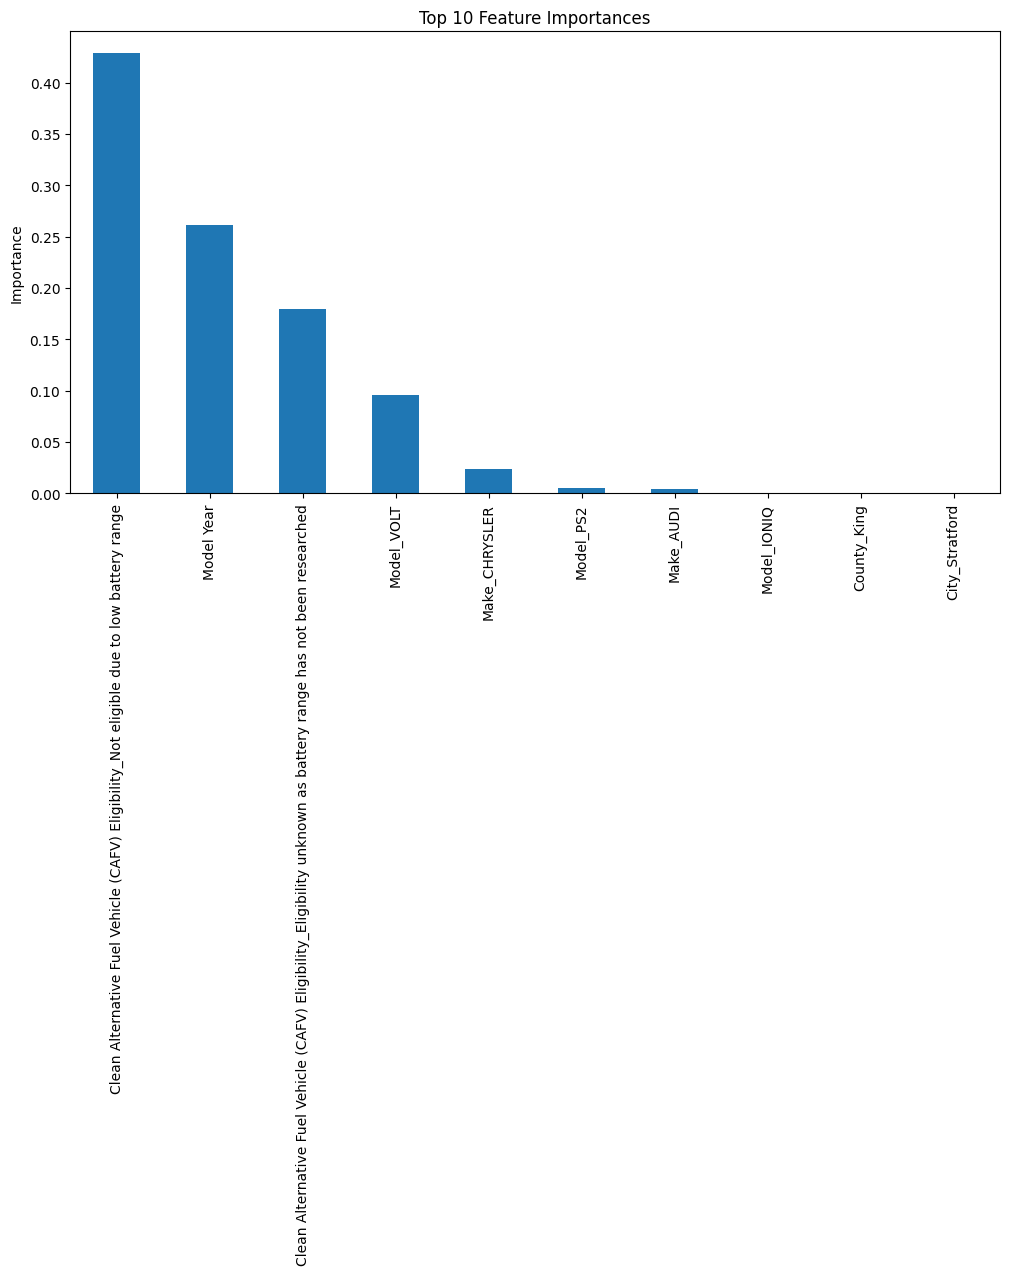

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = dt_pruned.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Top 10 Feature Importances:")
display(feat_imp.head(10))

feat_imp.head(10).plot(kind='bar', figsize=(12,6), title='Top 10 Feature Importances')
plt.ylabel('Importance')
plt.show()